# Data Dive I

Jacqueline Wu / Week 1 / 2018-09-05


**Dataset:** NYC Wi-Fi Hotspot Locations

**Source:** [NYC Open Data](https://data.cityofnewyork.us/City-Government/NYC-Wi-Fi-Hotspot-Locations/yjub-udmw)

Internet access is now considered to be a global public resource along with food, shelter, and water. I chose this dataset because I am interested in the accessibility and connectivity of New York City. Some questions I'm starting to ask:

+ Which areas are most/least connected?
+ Who is paying for this "free" internet?
+ Can an urban resident live only off of the city's provisions?

------


In [15]:
# Import matplotlib, numpy, and pandas.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# Use %matplotlib inline to make plots appear in the notebook.
%matplotlib inline

In [16]:
# Read your dataset in to a DataFrame with pd.read_csv (or appropriate file type).
nycwifi = pd.read_csv('data/NYC_Wi-Fi_Hotspot_Locations.csv')

In [11]:
# Tell me about the different variable types, 
# if there are missing data, and if there are variables that need to be recorded.
nycwifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 29 columns):
OBJECTID                3179 non-null int64
Borough                 3179 non-null object
Type                    3179 non-null object
Provider                3179 non-null object
Name                    2921 non-null object
Location                3179 non-null object
Latitude                3179 non-null float64
Longitude               3179 non-null float64
X                       3179 non-null float64
Y                       3179 non-null float64
Location_T              3179 non-null object
Remarks                 2608 non-null object
City                    3179 non-null object
SSID                    3179 non-null object
SourceID                2090 non-null object
Activated               1743 non-null object
BoroCode                3179 non-null int64
BoroName                3179 non-null object
NTACode                 3179 non-null object
NTAName                 3179 non-nul

In [12]:
# Display the first five rows of your dataframe.
nycwifi.head()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,NTAName,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,8641,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-25 41 AVENUE,40.755727,-73.944583,999603.226193,214613.274574,...,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4746,"Queens\n(40.75572700000, -73.94458300000)"
1,8642,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-43 41 AVENUE,40.755333,-73.944131,999728.543891,214469.807142,...,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4747,"Queens\n(40.75533300000, -73.94413100000)"
2,8643,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-05 41 AVENUE,40.755751,-73.945166,999441.701155,214621.916908,...,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4748,"Queens\n(40.75575100000, -73.94516600000)"
3,8644,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-05 41 AVENUE,40.755751,-73.945166,999441.701155,214621.916908,...,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4749,"Queens\n(40.75575100000, -73.94516600000)"
4,8645,QU,Free,Spot On Networks,QUEENS BRIDGE - JACOB A. RIIS Settlement House,10-05 41 AVENUE,40.755751,-73.945166,999441.701155,214621.916908,...,Queensbridge-Ravenswood-Long Island City,26,11101,401,25,4002500,4433386,4004700100,4750,"Queens\n(40.75575100000, -73.94516600000)"


In [24]:
# Select a column that is a categorical variable, and perform a .groupby() on this column.
boro = nycwifi.groupby('Borough').count()

In [31]:
boro[:]

,OBJECTID,Type,Provider,Name,Location,Latitude,Longitude,X,Y,Location_T,...,NTAName,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
Borough,,,,,,,,,,,,,,,,,,,,,
BK,694,694,694,594,694,694,694,694,694,694,...,694,694,694,694,694,694,694,694,694,694
BX,297,297,297,297,297,297,297,297,297,297,...,297,297,297,297,297,297,297,297,297,297
MN,1577,1577,1577,1419,1577,1577,1577,1577,1577,1577,...,1577,1577,1577,1577,1577,1577,1577,1577,1577,1577
QU,516,516,516,516,516,516,516,516,516,516,...,516,516,516,516,516,516,516,516,516,516
SI,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95


In [26]:
boro.index

Index(['BK', 'BX', 'MN', 'QU', 'SI'], dtype='object', name='Borough')

In [32]:
plt.bar(boro.index, boro) # what's wrong here?

ValueError: shape mismatch: objects cannot be broadcast to a single shape

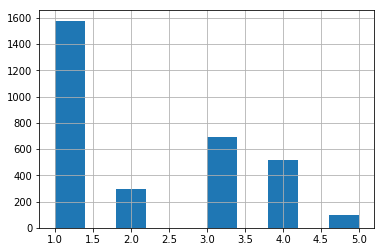

In [32]:
# Select a column that is a quantitative variable and make a histogram of this.
nycwifi['BoroCode'].hist()

Note: Borough Codes
1. Manhattan (New York County)
2. Bronx (Bronx County)
3. Brooklyn (Kings County)
4. Queens (Queens County)
5. Staten Island (Richmond County)

In [17]:
nycwifi[['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,3179.000000,3179.000000
mean,40.742141,-73.948829
std,0.067330,0.062305
min,40.509531,-74.244107
25%,40.695590,-73.984828
50%,40.746619,-73.959775
75%,40.793669,-73.926740
max,40.903723,-73.714838


In [16]:
import seaborn as sns

In [ ]:
nycwifi = sns.load_dataset(nycwifi)

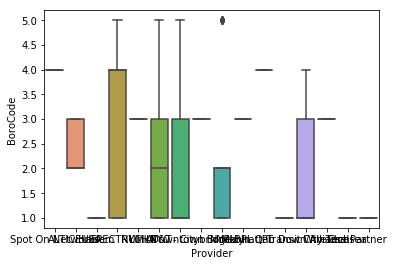

In [60]:
# Use the same column to make a boxplot.
ax = sns.boxplot('Provider', 'BoroCode', data = nycwifi)

In [57]:
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

[Text(0,0,'Spot On Networks'),
 Text(1,0,'ALTICEUSA'),
 Text(2,0,'Harlem'),
 Text(3,0,'SPECTRUM'),
 Text(4,0,'NYCHA'),
 Text(5,0,'AT&T'),
 Text(6,0,'LinkNYC - Citybridge'),
 Text(7,0,'Downtown Brooklyn'),
 Text(8,0,'NYPL'),
 Text(9,0,'BPL'),
 Text(10,0,'QPL'),
 Text(11,0,'Manhattan Down Alliance'),
 Text(12,0,'Transit Wireless'),
 Text(13,0,'City Tech'),
 Text(14,0,'Chelsea'),
 Text(15,0,'Partner')]

In [65]:
nycwifi.groupby('Provider').count()

,OBJECTID,Borough,Type,Name,Location,Latitude,Longitude,X,Y,Location_T,...,NTAName,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
Provider,,,,,,,,,,,,,,,,,,,,,
ALTICEUSA,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237
AT&T,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
BPL,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
Chelsea,30,30,30,0,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
City Tech,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Downtown Brooklyn,100,100,100,0,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
Harlem,128,128,128,0,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
LinkNYC - Citybridge,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,...,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731
Manhattan Down Alliance,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36


In [71]:
nycwifi.groupby(nycwifi['Location_T'] == 'Outdoor Kiosk').count()

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,...,NTAName,CounDist,Postcode,BoroCD,CT2010,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
Location_T,,,,,,,,,,,,,,,,,,,,,
False,1448,1448,1448,1448,1190,1448,1448,1448,1448,1448,...,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448
True,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731,...,1731,1731,1731,1731,1731,1731,1731,1731,1731,1731


-----

**Conclusions:** 
+ LinkNYC is the largest Internet provider, followed by SPECTRUM, AT&T, and ALTICEUSA.
+ Manhattan (Borough Code 1) has the most Internet hotspots -- about equal to all the others combined.
+ Providers have their territories. For example: public libraries only serve their boroughs, and wealthier neighborhoods like Chelsea and Downtown Brooklyn sponsor themselves.
+ (Only) Half of the hotspots are outdoor kiosks, which I've zeroed in on because they seem to be most accessible (24/hr, public space, etc.).